<a href="https://colab.research.google.com/github/amandasmagalhaes/data-science-flai/blob/main/M%C3%B3dulo%206.2%20-%20ML%20Pr%C3%A9%20Processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pré-processamento e Tunagem de Hiperparâmetros**

## **Uma terceira proposta de pré-processamento para o conjunto de dados do Titanic**
 

In [1]:
import pandas as pd
import numpy as np

In [2]:
url1 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv'
url2 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv'
treino = pd.read_csv(url1)
teste = pd.read_csv(url2) 

n = treino.shape[0]

In [3]:
targets = list(treino['Survived'])
targets

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [4]:
dataset = pd.concat([treino, teste]) 

In [5]:
dataset.shape

(1309, 12)

In [6]:
# mapeando o sexo em 0 e 1

dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}) 

---

In [7]:
# tranformação de variavel: pegar apenas o titulo presente no nome

def aux(x):
    return x.split(', ')[1].split('. ')[0]

dataset['Titulo'] = dataset['Name'].apply(aux)

In [8]:
titulos = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

dataset['Titulacao'] = dataset['Titulo'].map(titulos)

In [9]:
dataset['Survived'].groupby(dataset['Titulacao']).describe()

,count,mean,std,min,25%,50%,75%,max
Titulacao,,,,,,,,
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.00,1.0
Miss,184.0,0.701087,0.459031,0.0,0.0,1.0,1.00,1.0
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.00,1.0
Mrs,127.0,0.795276,0.405098,0.0,1.0,1.0,1.00,1.0
Officer,18.0,0.277778,0.460889,0.0,0.0,0.0,0.75,1.0
Royalty,5.0,0.600000,0.547723,0.0,0.0,1.0,1.00,1.0


---

In [10]:
# variavel Cabin

dataset['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [11]:
# tranformação de variavel: pegar apenas a primeira letra da variavel Cabin?

def aux(x):
    return list(str(x))[0]

dataset['Cabin'] = dataset['Cabin'].apply(aux) 

In [12]:
dataset['Cabin'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

---

---

In [13]:
# variavel parch e sibsb

In [14]:
dataset['Familia'] = dataset['SibSp'] + dataset['Parch'] + 1 

In [15]:
def aux(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

dataset['FamiliaTipo'] = dataset['Familia'].apply(aux) 

FamiliaTipo
Grande     0.161290
Pequena    0.578767
Sozinho    0.303538
Name: Survived, dtype: float64

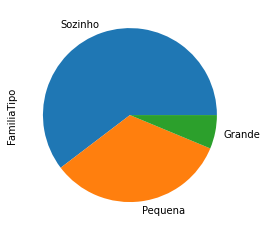

In [16]:
dataset['FamiliaTipo'].value_counts().plot(kind = 'pie')

dataset['Survived'].groupby(dataset['FamiliaTipo']).mean()

In [17]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo,Titulacao,Familia,FamiliaTipo
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,n,S,Mr,Mr,2,Pequena
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Mrs,2,Pequena
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,n,S,Miss,Miss,1,Sozinho
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs,Mrs,2,Pequena
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,n,S,Mr,Mr,1,Sozinho


In [18]:
# Dropando Variaveis 

variaveis = ['PassengerId', 'Name', 'Ticket', 'Titulo']

dataset.drop(variaveis, axis = 1, inplace = True)

In [19]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Titulacao,Familia,FamiliaTipo
0,0.0,3,0,22.0,1,0,7.2500,n,S,Mr,2,Pequena
1,1.0,1,1,38.0,1,0,71.2833,C,C,Mrs,2,Pequena
2,1.0,3,1,26.0,0,0,7.9250,n,S,Miss,1,Sozinho
3,1.0,1,1,35.0,1,0,53.1000,C,S,Mrs,2,Pequena
4,0.0,3,0,35.0,0,0,8.0500,n,S,Mr,1,Sozinho


In [20]:
# Dummificação

dummificar = ['Pclass', 'Cabin', 'Embarked', 'Titulacao', 'FamiliaTipo']
dataset = pd.get_dummies(dataset, columns = dummificar) 

In [21]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Familia,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0.0,0,22.0,1,0,7.2500,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,1.0,1,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0.0,0,35.0,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [22]:
dataset.isnull().sum()

Survived               418
Sex                      0
Age                    263
SibSp                    0
Parch                    0
Fare                     1
Familia                  0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Cabin_A                  0
Cabin_B                  0
Cabin_C                  0
Cabin_D                  0
Cabin_E                  0
Cabin_F                  0
Cabin_G                  0
Cabin_T                  0
Cabin_n                  0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
Titulacao_Master         0
Titulacao_Miss           0
Titulacao_Mr             0
Titulacao_Mrs            0
Titulacao_Officer        0
Titulacao_Royalty        0
FamiliaTipo_Grande       0
FamiliaTipo_Pequena      0
FamiliaTipo_Sozinho      0
dtype: int64

---

In [23]:
# variavel idade
# usar quando tiver tudo numericore

from sklearn.impute import KNNImputer 
imputer = KNNImputer()
knnimp = imputer.fit(dataset.loc[:n-1, :].drop('Survived', axis = 1))
knnimp = imputer.transform(dataset.drop('Survived', axis = 1))

In [24]:
dataset = pd.DataFrame(knnimp, columns = dataset.columns[1:]) 

In [25]:
 dataset.isnull().sum()

Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Familia                0
Pclass_1               0
Pclass_2               0
Pclass_3               0
Cabin_A                0
Cabin_B                0
Cabin_C                0
Cabin_D                0
Cabin_E                0
Cabin_F                0
Cabin_G                0
Cabin_T                0
Cabin_n                0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
Titulacao_Master       0
Titulacao_Miss         0
Titulacao_Mr           0
Titulacao_Mrs          0
Titulacao_Officer      0
Titulacao_Royalty      0
FamiliaTipo_Grande     0
FamiliaTipo_Pequena    0
FamiliaTipo_Sozinho    0
dtype: int64

In [26]:
treino = dataset.loc[:n-1, :]
teste = dataset.loc[n:, :]


In [27]:
# Padronização das variaveis

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

aux0 = sc.fit_transform(treino[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
treino = pd.concat([treino, aux1], axis = 1)
treino.drop(['Age', 'Fare'], axis = 1, inplace = True) 

In [28]:
aux0 = sc.transform(teste[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
teste = teste.reset_index()
teste = pd.concat([teste, aux1], axis = 1)
teste.drop(['Age', 'Fare', 'index'], axis = 1, inplace = True) 

In [29]:
treino.head()

,Sex,SibSp,Parch,Familia,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho,Idade,Tarifa
0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.575796,-0.502445
1,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.598609,0.786845
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.282195,-0.488854
3,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.378408,0.420730
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.378408,-0.486337


---

## **Usando o Random Forest como modelo básico**

O Random Forest, assim como os demais modelos baseados em árvores de decisão, possui um output interessante, chamado **feature importance**. É um atributo que nos informa quais variáveis são mais importantes para o modelo. Dessa maneira, é possível fazer uma seleção das variáveis mais importantes para utilizar em um modelo final. 

In [30]:
from sklearn.ensemble import RandomForestClassifier 

In [31]:
modelo_base = RandomForestClassifier() 
modelo_base.fit(treino, targets) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
modelo_base.feature_importances_

array([0.10865983, 0.01983357, 0.01745337, 0.03409166, 0.01585552,
       0.0131641 , 0.03572069, 0.00294788, 0.00602366, 0.00653207,
       0.00521002, 0.00967033, 0.00137446, 0.00120029, 0.00039443,
       0.03185068, 0.01089914, 0.00796954, 0.01322201, 0.01082562,
       0.03277676, 0.11952004, 0.03240075, 0.00850559, 0.00065292,
       0.01790611, 0.01632728, 0.00857951, 0.21548177, 0.1949504 ])

In [33]:
variaveis = pd.DataFrame()
variaveis['variavel'] = treino.columns
variaveis['importância'] = modelo_base.feature_importances_
variaveis

,variavel,importância
0,Sex,0.108660
1,SibSp,0.019834
2,Parch,0.017453
3,Familia,0.034092
4,Pclass_1,0.015856
5,Pclass_2,0.013164
6,Pclass_3,0.035721
7,Cabin_A,0.002948
8,Cabin_B,0.006024
9,Cabin_C,0.006532


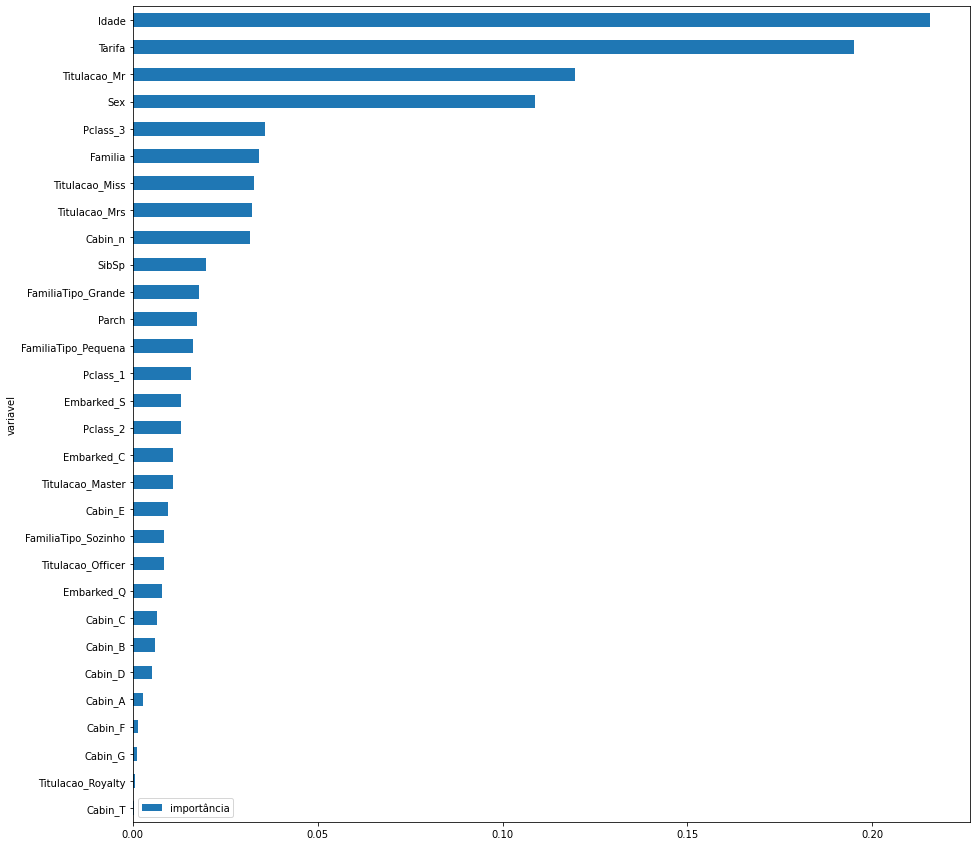

In [34]:
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(15, 15));


## **Selecionando as variáveis mais importantes com a função SelectFromModel, do scikit learn.**

In [35]:

from sklearn.feature_selection import SelectFromModel

seletor = SelectFromModel(modelo_base, prefit = True, max_features = 13, threshold = -np.inf)

treino_reduzido = seletor.transform(treino)
print(treino_reduzido.shape) 

teste_reduzido = seletor.transform(teste)
print(teste_reduzido.shape)

(891, 13)
(418, 13)


## **Melhor KNN** 

Hipertunagem de parâmetros nada mais é do que encontrar qual a melhor combinação de valores que passamos aos algoritmos no momento de seu treinamento. Algums modelos tem poucos hiperparâmetros que se deseja tunar, outros têm muitos. 

Para fazer essa checagem, testa-se através de um método de validação selecionado, o desempenho de cada possível combinação de hiperparâmetros apresentado. Logo se vê que se necessita de bastante poder computacional para realizar tal checagem. 

Na função abaixo, temos um programa que realiza a busca pelos hiperparâmetros. Veja que ela utiliza dois tipos de hipertunagem de parâmetros, o tipo = 'tudo', que testa todo espaço de parâmetros apresentado (custoso, lento, preciso), e o tipo = 'aleatorio', que testa apenas uma amostra aleatória do espaço de parâmetros (menos custoso, rápido, menos preciso). 

Nesse exemplo, estamos procurando qual é o melhor K para o KNN. Varremos todas as possibilidades de 1 até 49, de 2 em 2, o que totaliza 25 modelos diferentes para se testar. E em cada modelo, é aplicada a estratégia de validação corresponde, muitas vezes envolvendo várias iterações do K-Fold.

Devemos escolher entre as duas estratégias levando em consideração o recurso computacional que temos em mão e o tempo que podemos dispor para encontrar a solução. 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [37]:
def GridSearchKNN(treino, targets, tipo = 'tudo'):
    parametros = {   
                 'n_neighbors' : np.arange(1, 50, 2)
                 }

    modelo = KNeighborsClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

    if tipo == 'tudo':
        grid_search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'aleatorio':
        grid_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 10, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    grid_search.fit(treino, targets) 

    melhor = grid_search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
    print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

    return melhor

knn = GridSearchKNN(treino_reduzido, targets, tipo = 'tudo')


Fitting 100 folds for each of 25 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.2s



Acuracia: 0.8176
Melhores parâmetros: {'n_neighbors': 19}



[Parallel(n_jobs=-1)]: Done 2490 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   16.2s finished


## Melhor Árvore

In [38]:
def GridSearchARVORE(treino, targets, tipo = 'tudo'):
    parametros = {   
                 'max_depth' : np.arange(1,11), 
                 'min_samples_split': np.arange(2,12),
                 'min_samples_leaf': np.arange(1,11),
                 }

    modelo = DecisionTreeClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

    if tipo == 'tudo':
        grid_search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'aleatorio':
        grid_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 50, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    grid_search.fit(treino, targets) 

    melhor = grid_search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
    print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

    return melhor

arvore = GridSearchARVORE(treino, targets, tipo = 'aleatorio')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 100 folds for each of 50 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:    3.2s



Acuracia: 0.8213
Melhores parâmetros: {'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 3}



[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   19.2s finished


## Melhor Random Forest

In [39]:
def GridSearchRF(treino, targets, tipo = 'tudo'):
    parametros = {   
                 'max_depth' : [2, 6, 10],
                 'n_estimators': [50, 100, 150],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5],
                 'bootstrap': [True, False]
                 }

    modelo = RandomForestClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1)

    if tipo == 'tudo':
        grid_search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'aleatorio':
        grid_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 50, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    grid_search.fit(treino, targets) 

    melhor_rf = grid_search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
    print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

    return melhor_rf

rf = GridSearchRF(treino_reduzido, targets, tipo = 'aleatorio')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   54.6s



Acuracia: 0.8361
Melhores parâmetros: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 6, 'bootstrap': False}



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished


## Observação: Se o conjunto de dados de entrada for alterado, então a otimização de parâmetros deve ser refeita! O melhor conjunto de hiperparâmetros pode ser único para cada tipo de pré-processamento utilizado

In [40]:
rf1 = GridSearchRF(treino_reduzido, targets, tipo = 'aleatorio')


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished



Acuracia: 0.8350
Melhores parâmetros: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}



In [41]:
# Função para criar arquivos de submissão no Kaggle

def Submissao(treino, targets, teste, modelo, nome = 'submissaoKaggle'):
  
    modelo.fit(treino, targets)
    pred = modelo.predict(teste)

    url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv' 
    subm = pd.read_csv(url, usecols = ['PassengerId'] )  
    subm['Survived'] = pred
    
    subm.to_csv(nome + '.csv', index = False)  

In [42]:
#Bloco para gerar submissao

modelo = rf1
nome = 'GridSearchRF-SetupXYZred' 
Submissao(treino_reduzido, targets, teste_reduzido, modelo, nome)

---

In [43]:
# Criando uma combinação Hard e uma Soft dos algoritmos otimizados nesse script + Regressão Logística.
# Preparando e submetendo direto no Kaggle.

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression() 

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore), ('RF', rf) ]

modelo1 = VotingClassifier(modelos, voting = 'hard')
modelo2 = VotingClassifier(modelos, voting = 'soft')


modelo = modelo1
nome = 'SubmissaoCombinacaoHard' 
Submissao(treino_reduzido, targets, teste_reduzido, modelo, nome)

modelo = modelo2
nome = 'SubmissaoCombinacaoSoft' 
Submissao(treino_reduzido, targets, teste_reduzido, modelo, nome)
